# Confidence and prediction intervals

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

For a finite univariate random variable with a normal probability distribution, the mean $\mu$ (a measure of central tendency) and variance $\sigma^2$ (a measure of dispersion) of a population are the well known formulas:

\begin{equation}
\mu = \frac{1}{N}\sum_{i=1}^{N} x_i
\label{mu}
\end{equation}

\begin{equation}
\sigma^2 = \frac{1}{N}\sum_{i=1}^{N} (x_i - \mu)^2
\label{sigma2}
\end{equation}

For a more general case, a continuous univariate random variable $x$ with [probability density function](http://en.wikipedia.org/wiki/Probability_density_function) (PDF), $f(x)$, the mean and variance of a population are:

\begin{equation}
\mu = \int_{\infty}^{\infty} x f(x)\: dx
\label{mub}
\end{equation}

\begin{equation}
\sigma^2 = \int_{\infty}^{\infty} (x-\mu)^2 f(x)\: dx
\label{sigma2b}
\end{equation}

The PDF is a function that describes the relative likelihood for the random variable to take on a given value.   
Mean and variance are the first and second central moments of a random variable. The standard deviation $\sigma$ of the population is the square root of the variance.

The [normal (or Gaussian) distribution](http://en.wikipedia.org/wiki/Normal_distribution) is a very common and useful distribution, also because of the [central limit theorem](http://en.wikipedia.org/wiki/Central_limit_theorem), which states that for a sufficiently large number of samples (each with many observations) of an independent random variable with an arbitrary probability distribution, the means of the samples will have a normal distribution. That is, even if the underlying probability distribution of a random variable is not normal, if we sample enough this variable, the means of the set of samples will have a normal distribution. 

The probability density function of a univariate normal (or Gaussian) distribution is:

\begin{equation}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\Bigl(-\frac{(x-\mu)^2}{2\sigma^2}\Bigr)
\label{pdf}

The only parameters that define the normal distribution are the mean $\mu$ and the variance $\sigma^2$, because of that a normal distribution is usually described as $N(\mu,\:\sigma^2)$.

Here is a plot of the PDF for the normal distribution:

In [1]:
# import the necessary libraries
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from scipy import stats
import sys
sys.path.insert(1, r'./../functions')  # directory of BMC Python functions

<IPython.core.display.Javascript object>


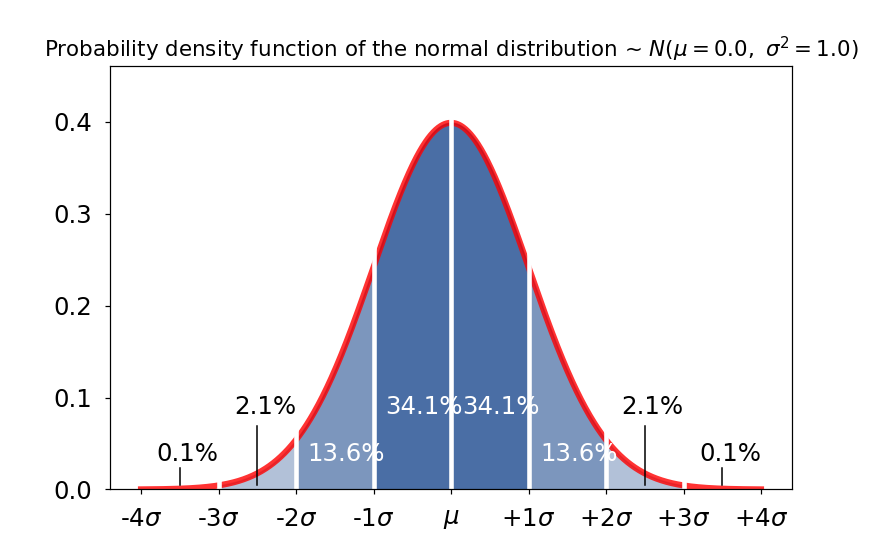

In [2]:
from pdf_norm_plot import pdf_norm_plot
pdf_norm_plot()
plt.show()

The horizontal axis above is shown in terms of the number of standard deviations in relation to the mean, which is known as standard score or $z$ score:

\begin{equation}
z = \frac{x - \mu}{\sigma}
\label{z}
\end{equation}

So, instead of specifying raw values in the distribution, we define the PDF in terms of $z$ scores; this conversion process is called standardizing the distribution (and the result is known as standard normal distribution). Note that because $\mu$ and $\sigma$ are known  parameters, $z$ has the same distribution as $x$, in this case, the normal distribution.   

The percentage numbers in the plot are the probability (area under the curve) for each interval shown in the horizontal label.  
An interval in terms of z score is specified as: $[\mu-z\sigma,\;\mu+z\sigma]$.  
The interval $[\mu-1\sigma,\;\mu+1\sigma]$ contains 68.3% of the population and the interval $[\mu-2\sigma,\;\mu+2\sigma]$ contains 95.4% of the population.   
These numbers can be calculated using the function `stats.norm.cdf()`, the [cumulative distribution function](http://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) of the normal distribution at a given value:

In [3]:
print('Cumulative distribution function (cdf) of the normal distribution:')
for i in range(-3, 4):
    display(Latex(r'%d $\sigma:\;$ %.2f' %(i, stats.norm.cdf(i, loc=0, scale=1)*100) + ' %'))

Cumulative distribution function (cdf) of the normal distribution:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

The parameters `loc` and `scale` are optionals and represent mean and variance of the distribution. The default is `loc=0` and `scale=1`.   
A commonly used proportion is 95%. The value that results is this proportion can be found using the function `stats.norm.ppf()`. If we want to find the $\pm$value for the interval that will result in 95% of the population inside, we have to consider that 2.5% of the population will stay out of the interval in each tail of the distribution. Because of that, the number we have to use with the `stats.norm.ppf()` is 0.975:

In [4]:
print('Percent point function (inverse of CDF) of the normal distribution:')
display(Latex(r'ppf(.975) = %.2f' % stats.norm.ppf(.975, loc=0, scale=1)))

Percent point function (inverse of CDF) of the normal distribution:


<IPython.core.display.Latex object>

Or we can use the function `stats.norm.interval` which already gives the interval:

In [5]:
print('Confidence interval around the mean:')
stats.norm.interval(alpha=0.95, loc=0, scale=1)

Confidence interval around the mean:


(-1.959963984540054, 1.959963984540054)

So, the interval $[\mu-1.96\sigma,\;\mu+1.96\sigma]$ contains 95% of the population.

Now that we know how the probability density function of a normal distribution looks like, let's demonstrate the central limit theorem for a uniform distribution. For that, we will generate samples of a uniform distribution, calculate the mean across samples, and plot the histogram of the mean  across samples:

<IPython.core.display.Javascript object>


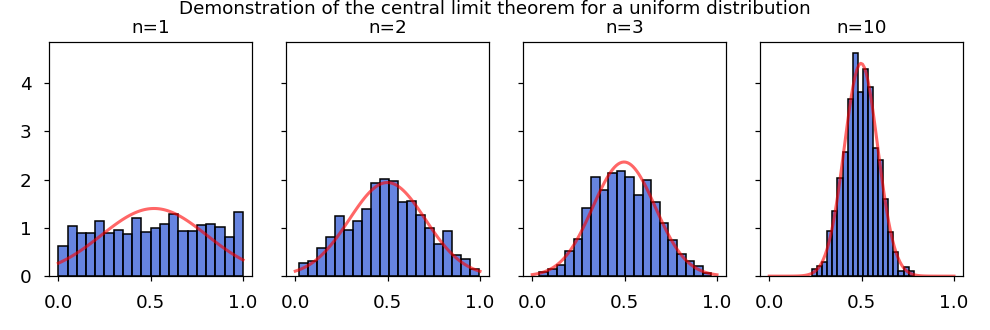

In [6]:
rc={'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(**rc)
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(9, 3))
x = np.linspace(0, 1, 100)
for i, n in enumerate([1, 2, 3, 10]):
    f = np.mean(np.random.random((1000, n)), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 20, density=True, color=[0, 0.2, .8, .6], edgecolor='black') 
    ax[i].set_title('n=%d' %n, fontsize=12)
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=2)
    ax[i].xaxis.label.set_size(12)
plt.suptitle('Demonstration of the central limit theorem for a uniform distribution', fontsize=12, y=1.0)
plt.tight_layout()
plt.show()

**Statistics for a sample of the population**

Parameters (such as mean and variance) are characteristics of a population; statistics are the equivalent for a sample. For a population and a sample with normal or Gaussian distribution, mean and variance is everything we need to completely characterize this population or sample.     

The difference between sample and population is fundamental for the understanding of probability and statistics.   
In Statistics, a sample is a set of data collected from a population. A population is usually very large and can't be accessed completely; all we have access is a sample (a smaller set) of the population.   

If we have only a sample of a finite univariate random variable with a normal distribution, both mean and variance of the population are unknown and they have to be estimated from the sample:

\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i=1}^{N} x_i
\label{mean}
\end{equation}

\begin{equation}
s^2 = \frac{1}{N-1}\sum_{i=1}^{N} (x_i - \bar{x})^2
\label{s2}
\end{equation}

The sample $\bar{x}$ and $s^2$ are only estimations of the unknown true mean and variance of the population, but because of the [law of large numbers](http://en.wikipedia.org/wiki/Law_of_large_numbers), as the size of the sample increases, the sample mean and variance have an increased probability of being close to the population mean and variance.

**Prediction interval around the mean**

For a sample of a univariate random variable, the area in an interval of the probability density function can't be interpreted anymore as the proportion of the sample lying inside the interval. Rather, that area in the interval is a prediction of the probability that a new value from the population added to the sample will be inside the interval. This is called a [prediction interval](http://en.wikipedia.org/wiki/Prediction_interval). However, there is one more thing to correct. We have to adjust the interval limits for the fact that now we have only a sample of the population and the parameters $\mu$ and $\sigma$ are unknown and have to be estimated. This correction will increase the interval for the same probability value of the interval because we are not so certain about the distribution of the population.  
To calculate the interval given a desired probability, we have to determine the distribution of the z-score equivalent for the case of a sample with unknown mean and variance:  

\begin{equation}
\frac{x_{n+i}-\bar{x}}{s\sqrt{1+1/n}}
\label{zb}
\end{equation}

Where $x_{n+i}$ is the new observation for which we want to calculate the prediction interval.  
The distribution of the ratio above is called <a href="http://en.wikipedia.org/wiki/Student's_t-distribution">Student's t-distribution</a> or simply $T$ distribution, with $n-1$ degrees of freedom. A $T$ distribution is symmetric and its pdf tends to that of the
standard normal as $n$ tends to infinity. 

Then, the prediction interval around the sample mean for a new observation is:

\begin{equation}
\left[\bar{x} - T_{n-1}\:s\:\sqrt{1+1/n},\quad \bar{x} + T_{n-1}\:s\:\sqrt{1+1/n}\right]
\label{pi}
\end{equation}

Where $T_{n-1}$ is the $100((1+p)/2)^{th}$ percentile of the Student's t-distribution with n−1 degrees of freedom.

For instance, the prediction interval with 95% of probability for a sample ($\bar{x}=0,\;s^2=1$) with size equals to 10 is:

In [7]:
np.asarray(stats.t.interval(alpha=0.95, df=25-1, loc=0, scale=1)) * np.sqrt(1+1/10)

array([-2.16463507,  2.16463507])

For a large sample (e.g., 10000), the interval approaches the one for a normal distribution (according to the [central limit theorem](http://en.wikipedia.org/wiki/Central_limit_theorem)):

In [8]:
np.asarray(stats.t.interval(alpha=0.95, df=10000-1, loc=0, scale=1)) * np.sqrt(1+1/10000)

array([-1.96029927,  1.96029927])

Here is a plot of the pdf for the normal distribution and the pdf for the Student's t-distribution with different number of degrees of freedom (n-1):

<IPython.core.display.Javascript object>


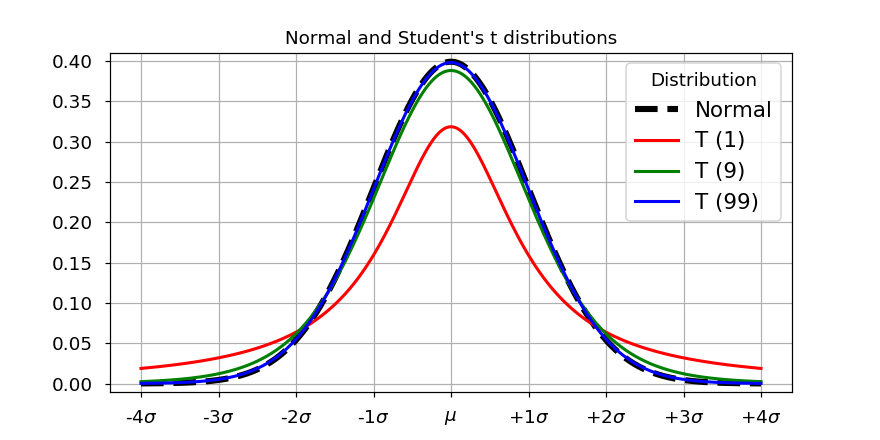

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
x = np.linspace(-4, 4, 1000)
f = stats.norm.pdf(x, loc=0, scale=1)
t2 = stats.t.pdf(x, df=2-1)
t10 = stats.t.pdf(x, df=10-1)
t100 = stats.t.pdf(x, df=100-1)
ax.plot(x, f, color='k', linestyle='--', lw=4, label='Normal')
ax.plot(x, t2, color='r', lw=2, label='T (1)')
ax.plot(x, t10, color='g', lw=2, label='T (9)')
ax.plot(x, t100, color='b', lw=2, label='T (99)')    
ax.legend(title='Distribution', fontsize=14)
ax.set_title("Normal and Student's t distributions", fontsize=12)
ax.set_xticks(np.linspace(-4, 4, 9))
xtl = [r'%+d$\sigma$' %i for i in range(-4, 5, 1)]
xtl[4] = r'$\mu$'
ax.set_xticklabels(xtl)
ax.set_ylim(-0.01, .41)
plt.grid()
plt.rc('font', size=12)
plt.show()

It's common to use 1.96 as value for the 95% prediction interval even when dealing with a sample; let's quantify the error of this approximation for different sample sizes: 

In [10]:
T = lambda n: stats.t.ppf(0.975, n-1)*np.sqrt(1+1/n)  # T distribution
N = stats.norm.ppf(0.975)                             # Normal distribution
for n in [1000, 100, 10]:
    print('\nApproximation error for n = %d' %n) 
    print('Using Normal distribution: %.1f%%' % (100*(N-T(n))/T(n)))


Approximation error for n = 1000
Using Normal distribution: -0.2%

Approximation error for n = 100
Using Normal distribution: -1.7%

Approximation error for n = 10
Using Normal distribution: -17.4%


For n=1000, the approximation is good, for n=10 it is bad, and it always underestimates. 

**Standard error of the mean**

The [standard error of the mean](http://en.wikipedia.org/wiki/Standard_error) (sem) is the standard deviation of the sample-mean estimate of a population mean and is given by:

\begin{equation}
sem = \frac{s}{\sqrt{n}}
\label{sem}
\end{equation}

**Confidence interval**

In statistics, a [confidence interval](http://en.wikipedia.org/wiki/Confidence_interval) (CI) is a type of interval estimate of a population parameter and is used to indicate the reliability of an estimate ([Wikipedia](http://en.wikipedia.org/wiki/Confidence_interval)). For instance, the 95% confidence interval for the sample-mean estimate of a population mean is:

\begin{equation}
\left[\bar{x} - T_{n-1}\:s/\sqrt{n},\quad \bar{x} + T_{n-1}\:s/\sqrt{n}\right] $$
\label{ci}
\end{equation}

Where $T_{n-1}$ is the $100((1+p)/2)^{th}$ percentile of the Student's t-distribution with n−1 degrees of freedom.   
For instance, the confidence interval for the mean with 95% of probability for a sample ($\bar{x}=0,\;s^2=1$) with size equals to 10 is:

In [11]:
stats.t.interval(alpha=0.95, df=10-1, loc=0, scale=1) / np.sqrt(10)

array([-0.71535691,  0.71535691])

The 95% CI means that if we randomly obtain 100 samples of a population and calculate the CI of each sample (i.e., we replicate the experiment 99 times in a independent way), 95% of these CIs should contain the population mean (the true mean). This is different from the prediction interval, which is larger, and gives the probability that a new observation is inside this interval. Note that the confidence interval DOES NOT give the probability that the true mean (the mean of the population) is inside this interval. The true mean is a parameter (fixed) and it is either inside the calculated interval or not; it is not a matter of chance (probability).    

Let's simulate samples of a population ~ $N(\mu=0, \sigma^2=1) $ and calculate the confidence interval for the samples' mean:

In [12]:
n = 20                            # number of observations
x = np.random.randn(n, 100)       # 100 samples with n observations
m = np.mean(x, axis=0)            # samples' mean
s = np.std(x, axis=0, ddof=1)     # samples' standard deviation
T = stats.t.ppf(.975, n-1)        # T statistic for 95% and n-1 degrees of freedom
ci = m + np.array([-s*T/np.sqrt(n), s*T/np.sqrt(n)])
out = ci[0, :]*ci[1, :] > 0       # CIs that don't contain the true mean

<IPython.core.display.Javascript object>


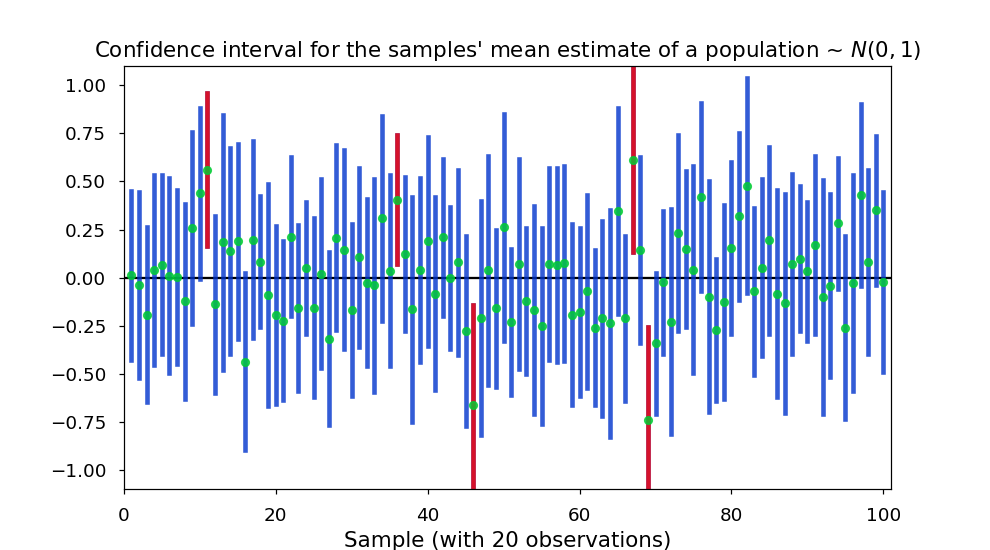

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ind = np.arange(1, 101)
ax.axhline(y=0, xmin=0, xmax=n+1, color=[0, 0, 0])
ax.plot([ind, ind], ci, color=[0, 0.2, 0.8, 0.8], marker='_', ms=0, linewidth=3)
ax.plot([ind[out], ind[out]], ci[:, out], color=[1, 0, 0, 0.8], marker='_', ms=0, linewidth=3)
ax.plot(ind, m, color=[0, .8, .2, .8], marker='.', ms=10, linestyle='')
ax.set_xlim(0, 101)
ax.set_ylim(-1.1, 1.1)
ax.set_title("Confidence interval for the samples' mean estimate of a population ~ $N(0, 1)$",
             fontsize=14)
ax.set_xlabel('Sample (with %d observations)' %n, fontsize=14)
plt.show()

Four out of 100 95%-CI's don't contain the population mean, about what we predicted.

And the standard deviation of the samples' mean per definition should be equal to the standard error of the mean:

In [14]:
print("Samples' mean and standard deviation:")
print('m = %.3f   s = %.3f' % (np.mean(m), np.mean(s)))
print("Standard deviation of the samples' mean:")
print('%.3f' % np.std(m, ddof=1))
print("Standard error of the mean:")
print('%.3f' % (np.mean(s)/np.sqrt(20)))

Samples' mean and standard deviation:
m = 0.010   s = 1.018
Standard deviation of the samples' mean:
0.234
Standard error of the mean:
0.228


Likewise, it's common to use 1.96 for the 95% confidence interval even when dealing with a sample; let's quantify the error of this approximation for different sample sizes: 

In [15]:
T = lambda n: stats.t.ppf(0.975, n-1)  # T distribution
N = stats.norm.ppf(0.975)              # Normal distribution
for n in [1000, 100, 10]:
    print('\nApproximation error for n = %d' %n) 
    print('Using Normal distribution: %.1f%%' % (100*(N-T(n))/T(n)))


Approximation error for n = 1000
Using Normal distribution: -0.1%

Approximation error for n = 100
Using Normal distribution: -1.2%

Approximation error for n = 10
Using Normal distribution: -13.4%


For n=1000, the approximation is good, for n=10 it is bad, and it always underestimates. 

For the case of a multivariate random variable, see [Prediction ellipse and prediction ellipsoid](http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/PredictionEllipseEllipsoid.ipynb).

### Verification of the relation between standard deviation and standard error of the mean

<IPython.core.display.Javascript object>


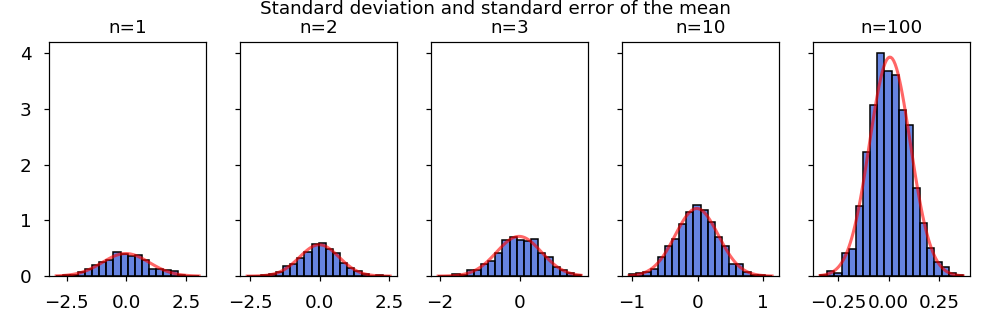

n          m          s     1/np.sqrt(n)
  1    -0.0212     0.9835     1.0000
  2    -0.0140     0.7088     0.7071
  3    -0.0251     0.5595     0.5774
 10    -0.0132     0.3289     0.3162
100     0.0069     0.1015     0.1000


In [16]:
rc = {'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(**rc)
fig, ax = plt.subplots(1, 5, sharey=True, squeeze=True, figsize=(9, 3))
print('{0:10} {1:10} {2:5} {3:10}'.format('n', 'm', 's', '1/np.sqrt(n)'))
for i, n in enumerate([1, 2, 3, 10, 100]):
    f = np.mean(np.random.randn(1000, n), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    x = np.linspace(np.min(f), np.max(f), 100)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 20, density=True, color=[0, 0.2, .8, .6], edgecolor='black') 
    ax[i].set_title('n=%d' %n, fontsize=12)
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=2)
    ax[i].xaxis.label.set_size(12)
    print('{0:3} {1:10.4f} {2:10.4f} {3:10.4f}'.format(n, m, s, 1/np.sqrt(n)))
plt.suptitle('Standard deviation and standard error of the mean', fontsize=12, y=1.0)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


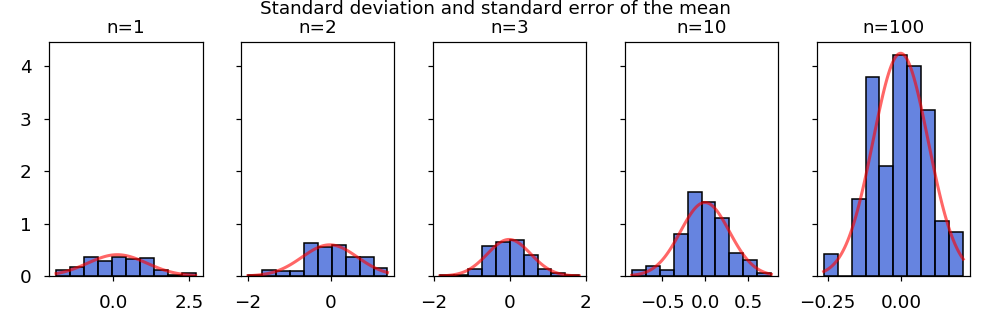

n          m          s     1/np.sqrt(n)
  1     0.1274     0.9783     1.0000
  2    -0.0279     0.6698     0.7071
  3    -0.0232     0.5716     0.5774
 10    -0.0054     0.2846     0.3162
100    -0.0014     0.0940     0.1000


In [17]:
rc = {'axes.labelsize': 12, 'font.size': 12, 'legend.fontsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(**rc)
fig, ax = plt.subplots(1, 5, sharey=True, squeeze=True, figsize=(9, 3))
print('{0:10} {1:10} {2:5} {3:10}'.format('n', 'm', 's', '1/np.sqrt(n)'))
for i, n in enumerate([1, 2, 3, 10, 100]):
    f = np.mean(np.random.randn(100, n), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    x = np.linspace(np.min(f), np.max(f), 100)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 10, density=True, color=[0, 0.2, .8, .6], edgecolor='black') 
    ax[i].set_title('n=%d' %n, fontsize=12)
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=2)
    ax[i].xaxis.label.set_size(12)
    print('{0:3} {1:10.4f} {2:10.4f} {3:10.4f}'.format(n, m, s, 1/np.sqrt(n)))
plt.suptitle('Standard deviation and standard error of the mean', fontsize=12, y=1.0)
plt.tight_layout()
plt.show()

## References

- Hahn GJ, Meeker WQ (1991) [Statistical Intervals: A Guide for Practitioners](http://books.google.com.br/books?id=ADGuRxqt5z4C). John Wiley & Sons.  
- Montgomery (2013) [Applied Statistics and Probability for Engineers](http://books.google.com.br/books?id=_f4KrEcNAfEC). John Wiley & Sons.  